**Name - Mohammad Saify Sheikh**

This project performs customer segmentation using clustering techniques to group customers based on their profile and transaction history. Non-numeric data is encoded, and numerical features are standardized to improve clustering accuraccy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

customer_transactions = transactions.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "TransactionID": "count"
}).reset_index()

merged_data = customers.merge(customer_transactions, on="CustomerID")

clustering_data = merged_data.drop(columns=["CustomerID"])


In [3]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

clustering_data = merged_data.drop(columns=["CustomerID", "CustomerName"])

for col in clustering_data.select_dtypes(include=['object']).columns:
    clustering_data[col] = LabelEncoder().fit_transform(clustering_data[col])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

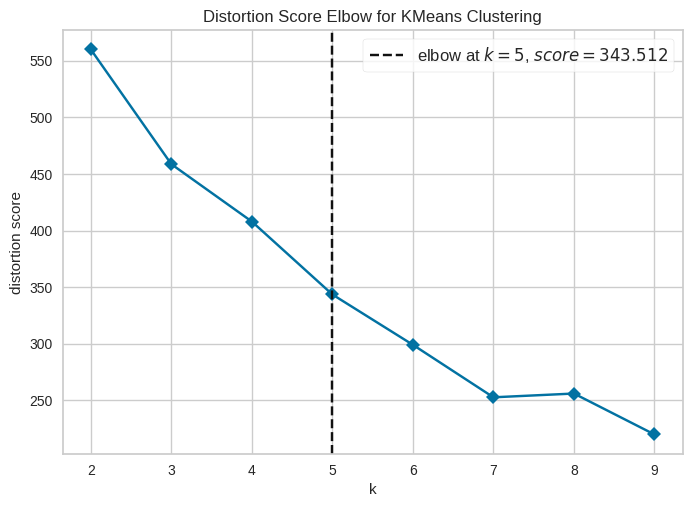

In [4]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="distortion", timings=False)
visualizer.fit(scaled_data)
visualizer.show()

optimal_clusters = visualizer.elbow_value_

In [5]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
merged_data["Cluster"] = kmeans.fit_predict(scaled_data)

db_index = davies_bouldin_score(scaled_data, merged_data["Cluster"])
silhouette = silhouette_score(scaled_data, merged_data["Cluster"])
print(f"Davies-Bouldin Index: {db_index:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Davies-Bouldin Index: 1.2749
Silhouette Score: 0.2286


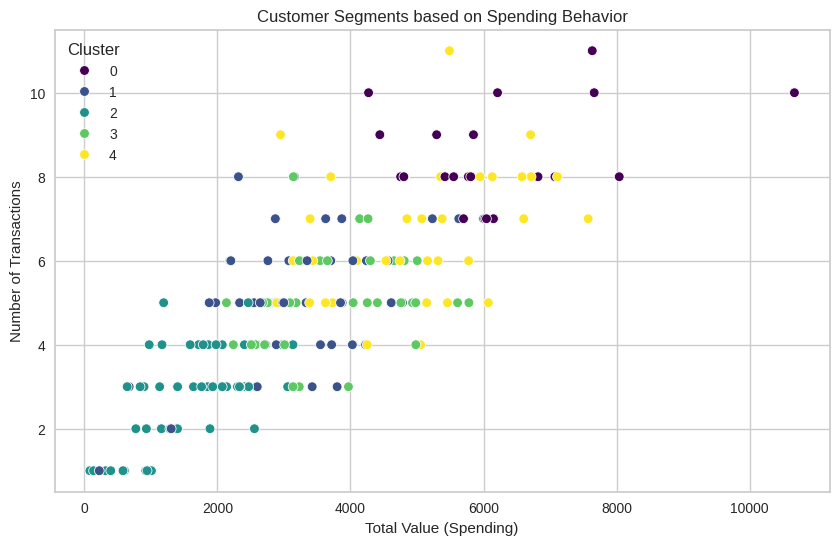

<ipython-input-6-031d3c363b7c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=merged_data["Cluster"], palette="coolwarm")


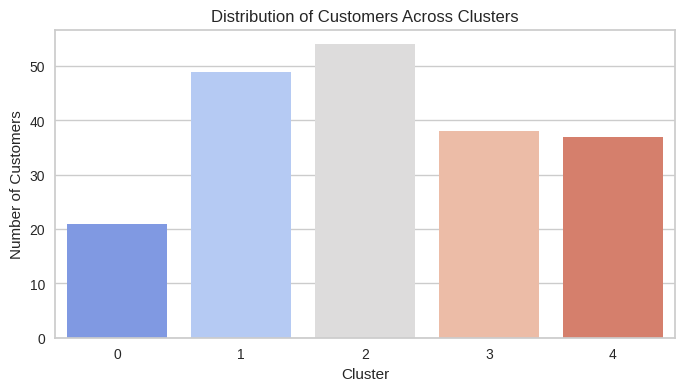

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=merged_data["TotalValue"], y=merged_data["TransactionID"], hue=merged_data["Cluster"], palette="viridis")
plt.xlabel("Total Value (Spending)")
plt.ylabel("Number of Transactions")
plt.title("Customer Segments based on Spending Behavior")
plt.legend(title="Cluster")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x=merged_data["Cluster"], palette="coolwarm")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customers Across Clusters")
plt.show()


In [7]:
merged_data.to_csv("Customer_Segments.csv", index=False)